In [1]:
using HDF5
using LaTeXStrings
using PyPlot
using DelimitedFiles

In [2]:
# give the directory where the data from all the runs are saved
your_dir = "/home/thanasis/repos/BondiToy/examples/run00"

"/home/thanasis/repos/BondiToy/examples/run00"

In [3]:
# SH model
data_dir_SH = your_dir*"/SH_smooth_B1"

#N=3 the times we doubled from Nx=17 to get this resolution
Nx = 129#17 # the overal course graining
Nz = 128#16
n = 0

# load the x grid
xc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/x.h5","x")
dxc = xc[2] - xc[1]
xm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/x.h5","x")
xh = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/x.h5","x")

# load the θ grid
zc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/z.h5","z")
dzc = zc[2] - zc[1]
zm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/z.h5","z")
zh = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/z.h5","z")

# load all the timesteps that data is writen
#tc = h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/t_out.h5","t_out")
#tm = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/t_out.h5","t_out")
#th = h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/t_out.h5","t_out")

tc = readdlm(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/L2_norm.dat", comments=true)[:,1]
tm = readdlm(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/L2_norm.dat", comments=true)[:,1]
th = readdlm(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/L2_norm.dat", comments=true)[:,1]

# create lists to save the common timesteps of the 3 resolutions
tm_c = zeros(length(tc));
th_c = zeros(length(tc));
xm_c = zeros(length(xc));
xh_c = zeros(length(xc));
zm_c = zeros(length(zc));
zh_c = zeros(length(zc));

In [4]:
#i is the timestep of the lowest resolution tc    
i=length(tc)-1

    i0 = i
    i1 = 2*i0
    i2 = 2*i1
    it_str_0  = lpad(i0, 4, "0")
    it_str_1  = lpad(i1, 4, "0")
    it_str_2  = lpad(i2, 4, "0")

       
    ψc_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/data_$(it_str_0).h5","ψ")
    ψm_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/data_$(it_str_1).h5","ψ")
    ψh_SH =  h5read(data_dir_SH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/data_$(it_str_2).h5","ψ")
    
print("$(tc[i0+1]), $(tm[i1+1]), $(th[i2+1]) \n")
   
    ψcm_SH = similar(ψc_SH)
    ψmh_SH = similar(ψc_SH)

        
    for j in 1:1:length(xc)-1

        l0 = j
        l1 = 2*(l0-1) + 1
        l2 = 2*(l1-1) + 1
        
        xm_c[l0] = xm[l1] - xc[l0]
        xh_c[l0] = xh[l2] - xc[l0]
    
        for p in 1:1:length(zc)

            p0 = p
            p1 = 2*p0 - 1               
            p2 = 2*p1 - 1
                
            zm_c[p0] = zm[p1] - zc[p0]
            zh_c[p0] = zh[p2] - zc[p0]
        
            ψcm_SH[l0, p0] = ψc_SH[l0, p0] - ψm_SH[l1, p1]
            ψmh_SH[l0, p0] = ψm_SH[l1, p1] - ψh_SH[l2, p2]
        end
        
    end

    xm_c[end] = xm[end] - xc[end]
    xh_c[end] = xh[end] - xc[end]

    for p in 1:1:length(zc)
        p0 = p
        p1 = 2*p0 - 1
        p2 = 2*p1 - 1
            
        ψcm_SH[end, p0] = ψc_SH[end, p0] - ψm_SH[end, p1]
        ψmh_SH[end, p0] = ψm_SH[end, p1] - ψh_SH[end, p2]
    
    end

1.0, 1.0, 1.0 


In [5]:
# WH model
data_dir_WH = your_dir*"/WH_smooth_B0"


    ψc_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^n + 1)_$(Nz*2^n)/data_$(it_str_0).h5","ψ")
    ψm_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^(n+1) + 1)_$(Nz*2^(n+1))/data_$(it_str_1).h5","ψ")
    ψh_WH =  h5read(data_dir_WH*"/data_$((Nx-1)*2^(n+2) + 1)_$(Nz*2^(n+2))/data_$(it_str_2).h5","ψ")
   
    ψcm_WH = similar(ψc_WH)
    ψmh_WH = similar(ψc_WH)

        
    for j in 1:1:length(xc)-1

        l0 = j
        l1 = 2*(l0-1) + 1
        l2 = 2*(l1-1) + 1
        
        for p in 1:1:length(zc)

            p0 = p
            p1 = 2*p0 - 1               
            p2 = 2*p1 - 1
        
            ψcm_WH[l0, p0] = ψc_WH[l0, p0] - ψm_WH[l1, p1]
            ψmh_WH[l0, p0] = ψm_WH[l1, p1] - ψh_WH[l2, p2]
        end
        
    end

    for p in 1:1:length(zc)
        p0 = p
        p1 = 2*p0 - 1
        p2 = 2*p1 - 1
            
        ψcm_WH[end, p0] = ψc_WH[end, p0] - ψm_WH[end, p1]
        ψmh_WH[end, p0] = ψm_WH[end, p1] - ψh_WH[end, p2]
    
    end

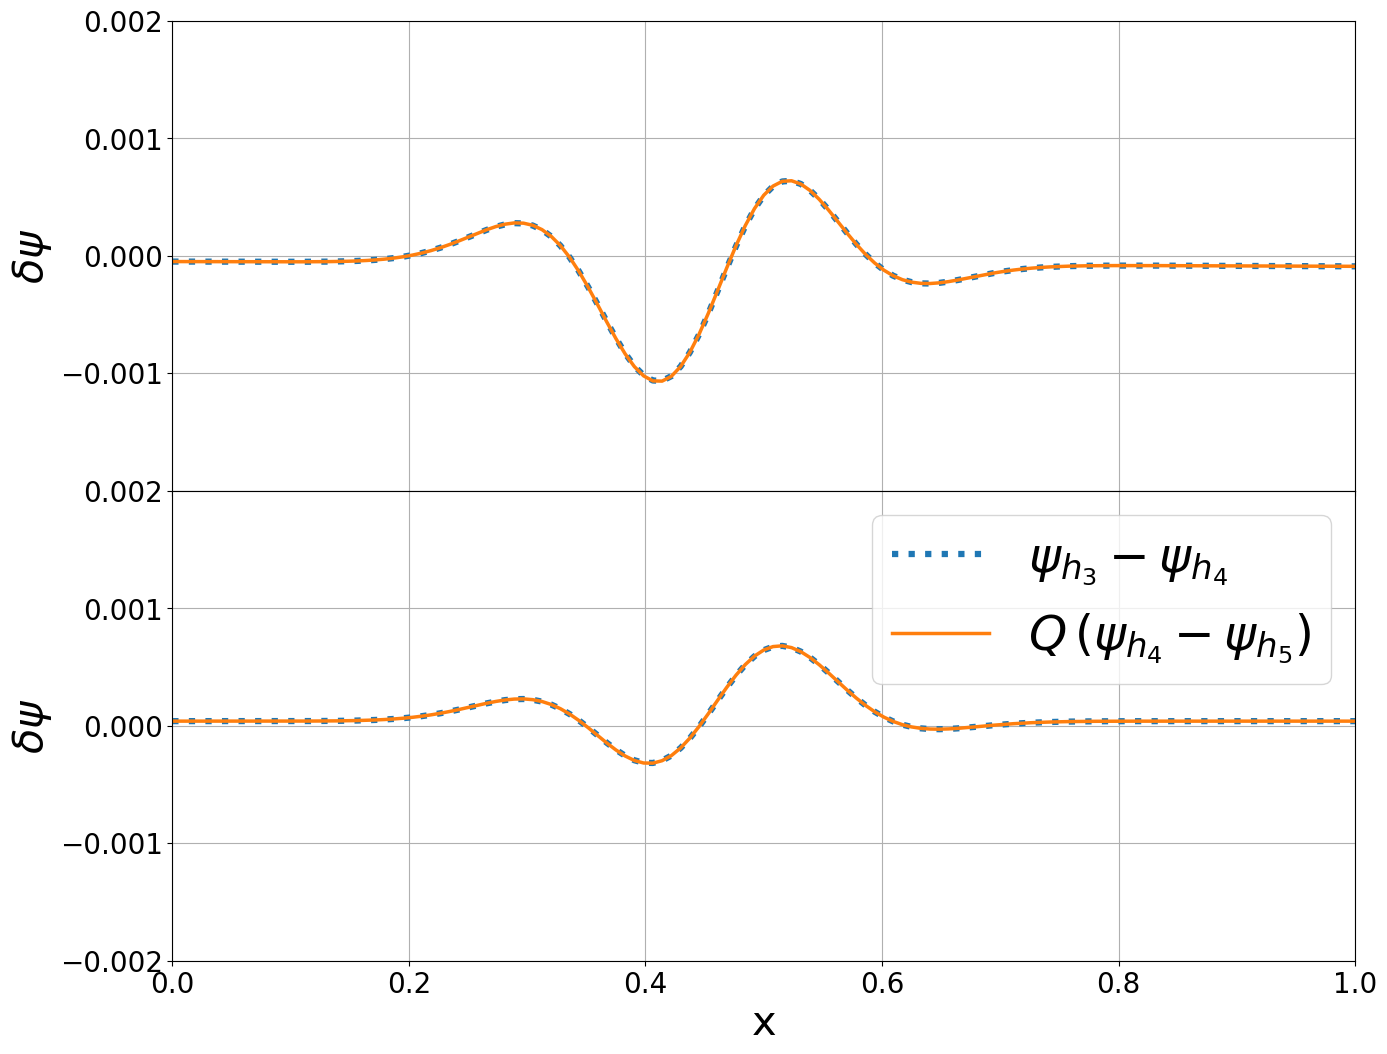

In [6]:
## PLOT for fixed z; not in paper ##
z_index = 9

fig = figure("pyplot_subplot_touching",figsize=(13,10))
subplots_adjust(hspace=0.0, wspace=0.1, top = 0.99, bottom = 0.05, right=0.98, left=0.07)# Set the vertical spacing between axes

subplot(211) # Create the 1st axis of a 3x1 array of axes
ax1 = gca()
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels
grid("on")
ylabel(L"δψ",fontsize="30")
yticks(-0.001:0.001:0.002,fontsize="20") # Set the y-tick range and step size
ylim(-0.002,0.002) # Set the y-limits
#plot
plot(xc, ψcm_SH[:,z_index], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}" )
plot(xc, 4*ψmh_SH[:,z_index], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)" )

subplot(212,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes

ax2 = gca()
setp(ax2.get_xticklabels(),visible=true) # Disable x tick labels
grid("on")
# x-axis
xlim(0.0,1.0) # Set the x-limits
xticks(0.0:0.2:1.0,fontsize="20") # Set the x-tick range and step size
xlabel("x",fontsize="30")
#y-axis
ylabel(L"δψ",fontsize="30")
yticks(-0.002:0.001:0.002,fontsize="20") # Set the y-tick range and step size
ylim(-0.002,0.002) # Set the y-limits
#plot
plot(xc, ψcm_WH[:,33], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(xc, 4*ψmh_WH[:,33], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)")

legend(fontsize="35")

fig.canvas.draw() # Update the figure

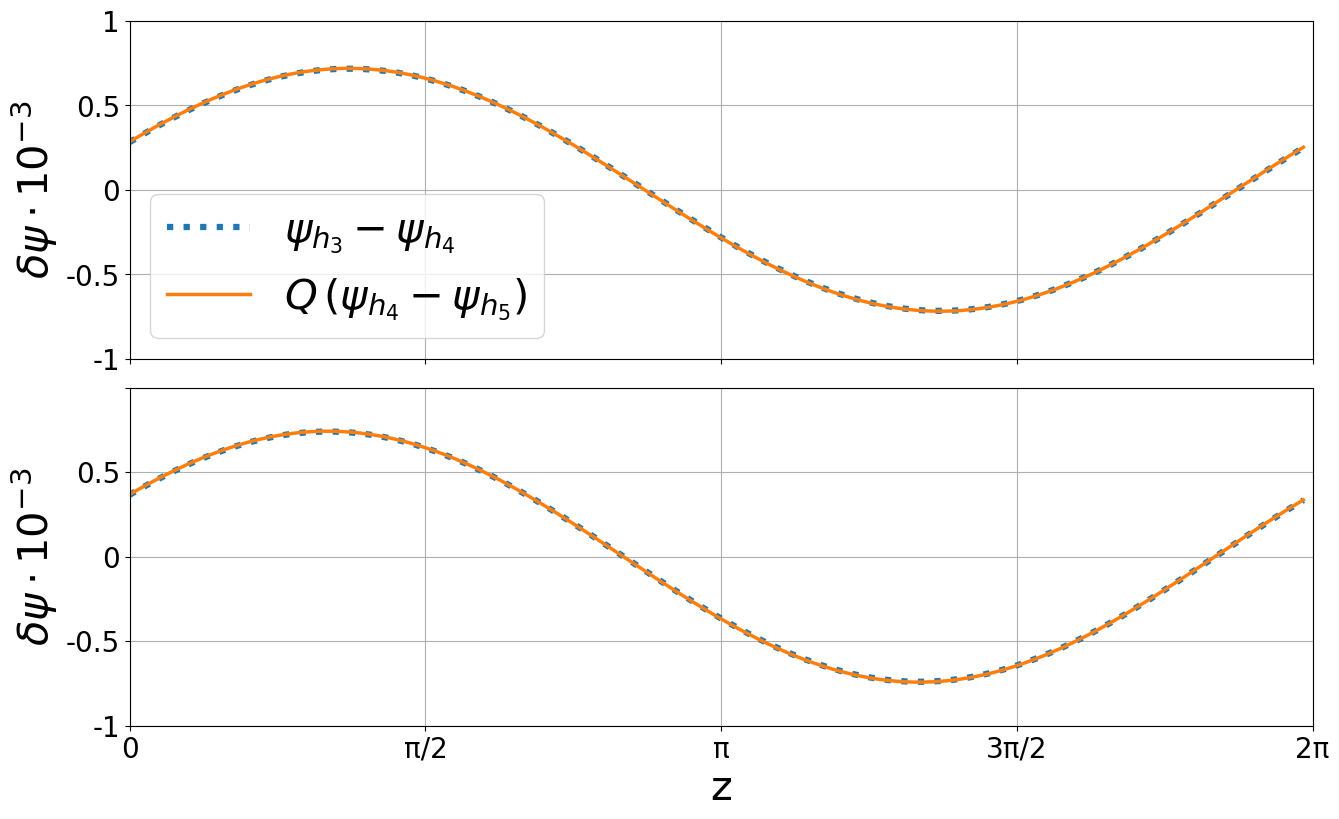

In [7]:
## PLOT for fixed x; see figure 6 of the paper ##

fig = figure("pyplot_subplot_touching",figsize=(13,7.5))
subplots_adjust(hspace=0.085, wspace=0.0, top = 0.99, bottom = 0.05, right=0.98, left=0.07)

subplot(211) # Create the 1st axis of a 3x1 array of axes
ax1 = gca()
setp(ax1.get_xticklabels(),visible=false) # Disable x tick labels
grid("on")
ylabel(L"δψ \cdot 10^{-3}",fontsize="30")
yticks(-0.001:0.0005:0.001,fontsize="20",["-1","-0.5","0","0.5","1"]) # Set the y-tick range and step size
ylim(-0.001,0.001) # Set the y-limits
#plot
plot(zc, ψcm_SH[65,:], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(zc, 4*ψmh_SH[65,:], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)" )

legend(fontsize="30")

subplot(212,sharex=ax1) # Create the 2nd axis of a 3x1 array of axes

ax2 = gca()
setp(ax2.get_xticklabels(),visible=true) # Disable x tick labels
grid("on")
# x-axis
xlim(0.0,2.0*π) # Set the x-limits
xticks(0.0:π/2:2.0*π,fontsize="20",["0","π/2","π","3π/2","2π"]) # Set the x-tick range and step size
xlabel("z", fontsize="30")#fontname="arial" 
#y-axis
ylabel(L"δψ \cdot 10^{-3}",fontsize="30")
yticks(-0.001:0.0005:0.001,fontsize="20",["-1","-0.5","0","0.5"]) # Set the y-tick range and step size
ylim(-0.001,0.001) # Set the y-limits
#plot
plot(zc, ψcm_WH[65,:], linestyle=":" , linewidth=4.5, label=L"ψ_{h_3}-ψ_{h_4}")
plot(zc, 4*ψmh_WH[65,:], linestyle="-", linewidth=2.5, label=L"Q \, \left(ψ_{h_4}-ψ_{h_5}\right)")

fig.canvas.draw() # Update the figure